In [248]:
#import section
import dicom
from dicompylercore import dicomparser, dvh, dvhcalc
import PIL
from PIL import Image
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [243]:
img_width=256
img_height=256
pathTrainNorm = "/Volumes/DATA 1/KAMI/lung_dataset/train/norm"
pathTrainPath = "/Volumes/DATA 1/KAMI/lung_dataset/train/pathology"
pathTestNorm = "/Volumes/DATA 1/KAMI/lung_dataset/test/norm"
pathTestPath = "/Volumes/DATA 1/KAMI/lung_dataset/test/pathology"
pathAllList = [pathTrainNorm, pathTrainPath, pathTestNorm, pathTestPath]

In [244]:
lstFilesTrainNorm = []
lstFilesTrainPath = []
lstFilesTestNorm = []
lstFilesTestPath = []
lstOfList = [lstFilesTrainNorm, lstFilesTrainPath, lstFilesTestNorm, lstFilesTestPath]
for idx,path in enumerate(pathAllList):
    for dirName, subdirList, fileList in os.walk(path):
        for subdir in subdirList:
            for x,y,subDirFiles in os.walk(path+"/"+subdir):
                for filename in subDirFiles:
                    if ".dcm" in filename.lower() or ".bin" in filename.lower():
                        lstOfList[idx].append(os.path.join(dirName,subdir,filename))

In [245]:
datasetFiles = [lstFilesTrainNorm,lstFilesTrainPath, lstFilesTestNorm, lstFilesTestPath]
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for lstIndex, lst in enumerate(datasetFiles):
    for path in lst:
        dp = dicomparser.DicomParser(path)
        print(path)
        img = dp.GetImage()
        img = img.resize((img_width, img_height), PIL.Image.BOX)
        data = np.asarray( img, dtype="uint8" )
        data = 255 - data
        if lstIndex==0:
            X_train.append(data)
            y_train.append(0)
        elif lstIndex==1:
            X_train.append(data)
            y_train.append(1)
        elif lstIndex==2:
            X_test.append(data)
            y_test.append(0)
        else:
            X_test.append(data)
            y_test.append(1)

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89552/89472.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89997/89917.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89452/89372.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90020/89940.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89833/89753.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89924/89844.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89535/89455.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90492/90410.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91305/91222.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89612/89532.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91240/91157.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90367/90285.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90620/90538.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91213/91130.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91170/91087.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90940/90858.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90153/90073.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89819/89739.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89509/89429.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90596/90514.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89423/89343.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89848/89768.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90486/90404.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90141/90061.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89285/89205.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90390/90308.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89585/89505.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90294/90214.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91299/91216.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91112/91029.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90107/90027.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90725/90643.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90833/90751.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90253/90173.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90341/90259.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89844/89764.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90368/90286.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89894/89814.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91144/91061.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89484/89404.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90646/90564.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89421/89341.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90644/90562.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90159/90079.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90151/90071.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89417/89337.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91030/90948.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89852/89772.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90904/90822.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91125/91042.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90834/90752.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89480/89400.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89429/89349.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89710/89630.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90255/90175.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89706/89626.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90859/90777.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91175/91092.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91327/91244.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91104/91021.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90572/90490.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90001/89921.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90331/90249.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89566/89486.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90874/90792.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90278/90198.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89972/89892.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90353/90271.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89878/89798.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91186/91103.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90774/90692.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90484/90402.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90396/90314.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89905/89825.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90472/90390.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89491/89411.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89759/89679.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89563/89483.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90768/90686.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89352/89272.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89857/89777.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89919/89839.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89800/89720.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89232/89152.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91024/90942.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89311/89231.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89572/89492.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90443/90361.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91276/91193.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90422/90340.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91100/91017.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91085/91002.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89558/89478.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90829/90747.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89295/89215.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91231/91148.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90069/89989.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89527/89447.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90901/90819.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89432/89352.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90375/90293.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91123/91040.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89801/89721.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89855/89775.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90204/90124.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89354/89274.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89576/89496.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90806/90724.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89264/89184.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89901/89821.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89313/89233.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90832/90750.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89247/89167.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91371/91288.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90947/90865.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90468/90386.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90777/90695.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89512/89432.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89273/89193.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89757/89677.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90999/90917.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91149/91066.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89343/89263.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91202/91119.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89439/89359.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91267/91184.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89628/89548.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90563/90481.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90024/89944.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89935/89855.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89904/89824.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90723/90641.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89342/89262.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90536/90454.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90976/90894.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89643/89563.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90683/90601.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90217/90137.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89367/89287.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89787/89707.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90602/90520.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90409/90327.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89444/89364.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90660/90578.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90555/90473.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91248/91165.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89455/89375.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89734/89654.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89860/89780.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90373/90291.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89859/89779.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91269/91186.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90120/90040.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89942/89862.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90512/90430.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91058/90975.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89626/89546.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89933/89853.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90542/90460.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91340/91257.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91285/91202.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91088/91005.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91261/91178.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91226/91143.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89245/89165.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89457/89377.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91339/91256.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89949/89869.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91359/91276.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89918/89838.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89475/89395.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89673/89593.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89629/89549.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89602/89522.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90518/90436.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90816/90734.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90985/90903.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90075/89995.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89359/89279.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90787/90705.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89864/89784.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89487/89407.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89893/89813.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91159/91076.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90136/90056.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90800/90718.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90026/89946.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91108/91025.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90088/90008.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90801/90719.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90522/90440.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89383/89303.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90343/90261.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90648/90566.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89256/89176.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89282/89202.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89494/89414.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90707/90625.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89517/89437.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90719/90637.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91152/91069.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89506/89426.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89428/89348.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90603/90521.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89355/89275.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90629/90547.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90235/90155.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89928/89848.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89853/89773.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90857/90775.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90875/90793.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89289/89209.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89603/89523.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89519/89439.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90586/90504.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90412/90330.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90661/90579.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91317/91234.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90577/90495.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89422/89342.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90201/90121.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91027/90945.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90958/90876.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91163/91080.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90312/90231.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90570/90488.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90280/90200.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89554/89474.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90435/90353.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91322/91239.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90794/90712.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91394/91311.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89715/89635.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90295/90215.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90756/90674.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90126/90046.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89526/89446.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91275/91192.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90483/90401.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91068/90985.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90949/90867.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89305/89225.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90418/90336.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90987/90905.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89807/89727.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91095/91012.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89779/89699.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/91094/91011.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89530/89450.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89687/89607.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89296/89216.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90256/90176.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90315/90234.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90420/90338.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/90453/90371.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/norm/89698/89618.bin
/Volumes/DATA 1/KAMI/lun

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/163048/162853.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/107226/107120.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/247824/247480.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/225294/225001.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/136503/136344.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/200496/200245.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/167105/166905.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/195403/195160.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/112272/112156.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/197847/197600.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/303677/303251.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/8097/8089.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/271078/270701.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/342439/341939.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/29

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/177549/177335.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/205133/204878.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/334296/333810.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/148518/148349.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/223318/223027.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/231450/231148.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/247266/246922.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/147843/147675.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/102162/102063.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/263156/262799.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/158485/158295.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/271113/270735.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/191162/190925.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/87890/87812.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/284819/284419.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/304592/304163.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/234781/234467.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/239287/238964.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/251515/251171.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/184655/184426.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/337471/336981.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/295742/295324.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/291293/290884.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/110046/109936.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/258765/258410.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/79025/78958.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/287328/286924.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/159225/159034.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/165048/164848.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/335358/334870.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/267328/266967.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/296947/296527.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/298840/298420.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/226697/226402.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/341839/341340.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/305036/304607.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/259751/259395.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/164488/164288.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/102377/102278.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/162471/162276.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/196488/196242.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/241671/241343.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/patholog

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/112332/112216.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/88343/88264.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/150189/150020.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/193559/193316.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/343388/342886.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/132857/132701.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/15568/15552.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/203209/202955.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/155345/155165.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/105848/105743.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/88836/88757.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/118855/118724.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/239270/238947.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/100662/100565.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/1985

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/280678/280284.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/275118/274730.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/184350/184121.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/111790/111675.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/301935/301511.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/79115/79048.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/187120/186888.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/110471/110360.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/202315/202062.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/134329/134173.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/88329/88250.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/175186/174977.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/230687/230385.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/277743/277354.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/88

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/116951/116825.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/190036/189802.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/201118/200866.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/95267/95179.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/340454/339959.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/308768/308331.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/306621/306191.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/125258/125118.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/314439/313988.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/8571/8562.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/135489/135331.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/183167/182938.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/87790/87712.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/341632/341133.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/112716

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/107590/107483.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/99302/99206.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/342824/342323.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/89427/89347.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/290750/290341.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/340362/339867.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/74249/74186.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/148125/147956.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/309079/308641.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/210806/210541.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/220469/220180.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/113333/113213.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/202756/202503.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/190749/190514.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/1816

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/153655/153476.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/277791/277402.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/104680/104575.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/179992/179771.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/210591/210326.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/17699/17685.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/287334/286930.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/268684/268317.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/297119/296699.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/174401/174193.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/190469/190235.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/164368/164168.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/240228/239903.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/238589/238268.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/111843/111728.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/99376/99280.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/129630/129484.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/270931/270554.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/136181/136022.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/156328/156145.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/295471/295053.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/310963/310520.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/15261/15245.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/247900/247556.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/139790/139630.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/204877/204622.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/232102/231799.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/132603/132447.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/29

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/332438/331952.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/16489/16475.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/239366/239043.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/119392/119261.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/225410/225117.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/270031/269658.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/191501/191263.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/310813/310371.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/104332/104228.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/124779/124639.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/270557/270181.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/93060/92975.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/239549/239226.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/269798/269427.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/14

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/166439/166239.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/245399/245057.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/298731/298311.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/87100/87025.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/304840/304411.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/239580/239257.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/89622/89542.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/273939/273557.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/12515/12503.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/105929/105824.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/160586/160395.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/132108/131955.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/9748/9738.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/307355/306924.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/113320/1

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/199948/199697.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/113603/113483.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/245384/245042.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/156827/156643.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/339422/338929.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/317114/316663.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/7046/7038.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/128151/128007.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/209194/208936.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/232602/232296.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/150645/150476.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/265631/265272.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/280060/279666.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/190453/190219.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/10

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/150111/149942.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/204030/203776.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/256951/256596.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/233886/233575.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/194610/194367.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/89938/89858.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/268585/268219.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/295901/295483.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/177452/177238.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/296944/296524.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/16637/16623.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/105502/105397.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/114030/113909.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/113199/113079.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/14

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/320349/319890.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/111285/111174.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/166602/166402.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/242020/241689.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/101900/101802.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/282364/281966.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/306095/305666.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/338239/337748.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/244784/244442.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/104617/104512.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/254345/253993.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/179103/178885.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/86315/86240.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/81983/81911.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/33

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/87708/87630.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/88946/88866.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/275055/274667.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/155961/155778.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/234800/234486.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/338015/337524.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/198070/197822.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/6567/6561.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/153732/153553.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/304841/304412.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/121124/120994.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/175717/175507.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/342597/342097.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/208536/208279.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/89984/

/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/272973/272592.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/249286/248942.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/290612/290203.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/269825/269454.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/320149/319691.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/105024/104919.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/290072/289665.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/339541/339048.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/313744/313296.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/247695/247351.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/272962/272581.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/187950/187717.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/248872/248528.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/pathology/273480/273098.bin
/Volumes/DATA 1/KAMI/lung_dataset/train/patholog

/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91540/91457.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91458/91375.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91539/91456.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91467/91384.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91496/91413.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91420/91337.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91549/91466.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91402/91319.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91505/91422.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91558/91475.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91526/91443.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91618/91535.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91628/91545.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91407/91324.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91606/91523.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91530/91447.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/n

/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91415/91332.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91533/91450.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91461/91378.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91599/91516.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91498/91415.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91509/91426.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91453/91370.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91555/91472.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91598/91515.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91622/91539.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91561/91478.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91593/91510.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91436/91353.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91546/91463.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91607/91524.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/norm/91570/91487.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/n

/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/359033/358518.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/367253/366729.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/367467/366943.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/360398/359882.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/360772/360256.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/379084/378541.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/347738/347232.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/363887/363368.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/360381/359865.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/345758/345253.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/356481/355967.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/364212/363693.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/379131/378588.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/363068/362550.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/365371/364848

/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/379102/378559.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/358208/357693.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/378887/378345.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/375381/374848.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/355852/355339.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/371017/370489.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/358474/357959.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/350074/349567.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/369884/369356.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/353447/352937.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/357152/356638.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/356178/355665.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/345910/345405.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/362672/362155.bin
/Volumes/DATA 1/KAMI/lung_dataset/test/pathology/365309/364786

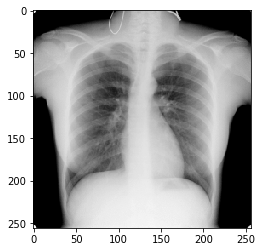

In [246]:
img = Image.fromarray(X_train[255])
pylab.imshow(img, cmap=pylab.cm.gray)
pylab.show()

In [264]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rotation_range=15,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [282]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
if K.image_data_format() == 'channels_first':
    input_shape_aug = (1, img_width, img_height, x_train.shape[0])
    input_shape = (img_width, img_height, X_train.shape[0])
else:
    input_shape_aug = (X_train.shape[0],img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)
X_train = X_train.reshape(input_shape_aug)
X_test = X_test.reshape(X_test.shape[0],img_width, img_height, 1)

In [295]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=16),
                    steps_per_epoch=len(X_train), epochs=2)

Epoch 1/2
1495/4216 [=========>....................] - ETA: 5083s - loss: 7.9632 - acc: 0.5005

KeyboardInterrupt: 

In [284]:
model.fit(X_train, y_train, batch_size=32, epochs=32,  validation_data=(X_test, y_test), shuffle=True)

Train on 4216 samples, validate on 467 samples
Epoch 1/32
1696/4216 [===========>..................] - ETA: 284s - loss: 7.7501 - acc: 0.5100

KeyboardInterrupt: 

In [274]:
i = 0
for batch in datagen.flow(X_train, batch_size=1,
                          save_to_dir='preview', save_prefix='lung', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [272]:
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])